<a href="https://colab.research.google.com/github/colmBandit/AnacondaML/blob/main/KNearestNeighor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits=load_digits()

In [6]:
type(digits)

sklearn.utils._bunch.Bunch

In [7]:
print(type(digits))

<class 'sklearn.utils._bunch.Bunch'>


In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
digits.target[0]

0

In [10]:
digits.target[::4]

array([0, 4, 8, 2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2,
       6, 9, 8, 4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1,
       5, 2, 2, 6, 3, 6, 1, 5, 0, 6, 7, 9, 8, 4, 6, 7, 7, 2, 8, 0, 0, 4,
       8, 2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9,
       8, 4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1, 5, 2,
       2, 6, 3, 6, 1, 5, 0, 6, 7, 1, 7, 3, 5, 6, 4, 8, 7, 8, 0, 0, 4, 8,
       2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9, 8,
       4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1, 5, 2, 2,
       6, 3, 6, 1, 5, 0, 6, 7, 1, 7, 3, 5, 6, 4, 8, 7, 8, 0, 0, 4, 8, 2,
       6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9, 8, 4,
       6, 7, 7, 2, 5, 4, 9, 3, 7, 1, 5, 9, 3, 7, 9, 5, 9, 7, 1, 2, 6, 3,
       6, 1, 5, 0, 6, 4, 3, 6, 1, 3, 1, 4, 2, 9, 9, 8, 3, 7, 1, 5, 9, 3,
       7, 9, 5, 9, 7, 1, 8, 2, 7, 6, 9, 9, 2, 7, 1, 3, 1, 4, 0, 9, 5, 2,
       5, 4, 9, 8, 3, 7, 1, 5, 9, 3, 7, 9, 5, 9, 7,

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits.data.shape

(1797, 64)

In [14]:
import matplotlib.pyplot as plt

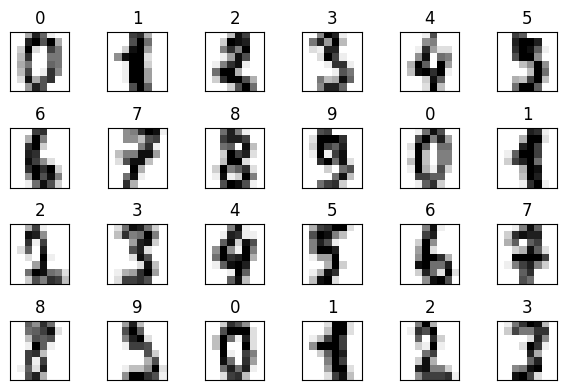

In [15]:
figure, axes =plt.subplots(nrows=4, ncols=6, figsize=(6,4))
for item in zip (axes.ravel(), digits.images, digits.target):
    axes, image, target =item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, random_state=11)

In [18]:
digits.data.shape

(1797, 64)

In [19]:
X_train.shape

(1347, 64)

In [20]:
y_train.shape

(1347,)

In [21]:
X_test.shape

(450, 64)

In [22]:
1347/1797*100

74.95826377295492

In [ ]:
# creating the model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [ ]:
# prediction

In [26]:
predicated = knn.predict(X=X_test)

In [27]:
predicated

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 8, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 4, 7, 2, 0, 3, 7, 8, 8, 7, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 2, 5, 3,

In [28]:
expected = y_test

In [29]:
expected

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [30]:
wrong=[(p,e) for (p,e) in zip(predicated, expected) if p !=e]

In [31]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [32]:
440/450*100

97.77777777777777

In [33]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion=confusion_matrix(y_true=expected, y_pred=predicated)

In [36]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

In [37]:
type(confusion)

numpy.ndarray

In [38]:
import pandas as pd

In [39]:
confusion_df=pd.DataFrame(confusion, index=range(10), columns=range(10))

In [40]:
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0
2,0,0,54,0,0,0,0,0,0,0
3,0,0,0,42,0,1,0,1,0,0
4,0,0,0,0,49,0,0,1,0,0
5,0,0,0,0,0,38,0,0,0,0
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,45,0,0
8,0,1,1,2,0,0,0,0,39,1
9,0,0,0,0,1,0,0,0,1,41


In [41]:
import seaborn as sns

<Axes: >

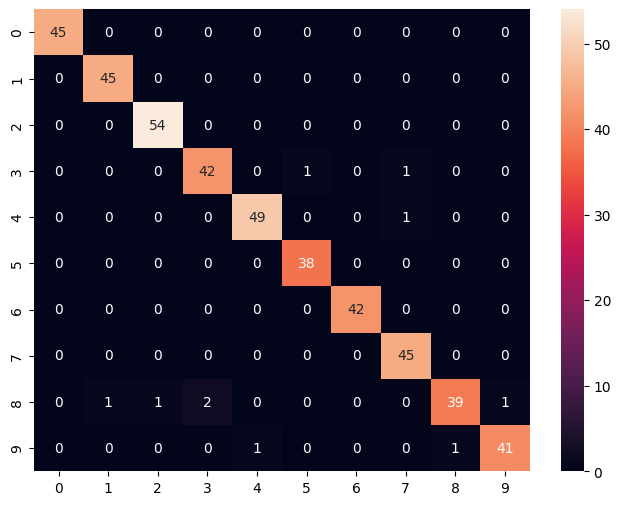

In [42]:
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, ax=ax)

In [ ]:
#20% testing and 80% training
#50% testing and 50% training
#30% training and 70% testing
#comments about accuracy of the model- before the next class url of github

In [ ]:
#20% testing and 80% training

In [43]:
# Splitting the dataset: 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(digits.data, digits.target, train_size=0.8, test_size=0.2, random_state=11)

In [44]:
# Creating and training the model
knn_80_20 = KNeighborsClassifier()
knn_80_20.fit(X=X_train_80, y=y_train_80)

KNeighborsClassifier()

In [45]:
# Making predictions
predicted_80_20 = knn_80_20.predict(X=X_test_20)

In [47]:
predicted_80_20

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 8, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 4, 7, 2, 0, 3, 7, 8, 8, 7, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [48]:
# Comparing predictions with expected values
expected_80_20 = y_test_20

In [49]:
expected_80_20

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [50]:
# Calculating accuracy
accuracy_80_20 = knn_80_20.score(X_test_20, y_test_20)
print(f'Accuracy for 80% Training and 20% Testing: {accuracy_80_20:.2%}')

Accuracy for 80% Training and 20% Testing: 98.61%


In [51]:
# Creating a confusion matrix
confusion_80_20 = confusion_matrix(y_true=expected_80_20, y_pred=predicted_80_20)

In [52]:
confusion_80_20

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [53]:
# Converting the confusion matrix to a DataFrame
confusion_df_80_20 = pd.DataFrame(confusion_80_20, index=range(10), columns=range(10))

In [54]:
confusion_df_80_20

,0,1,2,3,4,5,6,7,8,9
0,38,0,0,0,0,0,0,0,0,0
1,0,37,0,0,0,0,0,0,0,0
2,0,0,39,0,0,0,0,0,0,0
3,0,0,0,39,0,1,0,1,0,0
4,0,0,0,0,40,0,0,1,0,0
5,0,0,0,0,0,27,0,0,0,0
6,0,0,0,0,0,0,30,0,0,0
7,0,0,0,0,0,0,0,36,0,0
8,0,0,0,0,0,0,0,0,34,0
9,0,0,0,0,1,0,0,0,1,35


Text(0.5, 1.0, 'Confusion Matrix (80% Training, 20% Testing)')

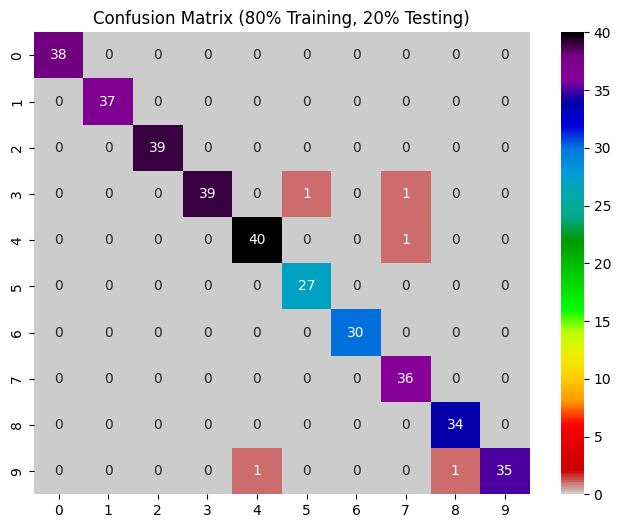

In [82]:
# Visualizing the confusion matrix using a heatmap
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_80_20, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (80% Training, 20% Testing)')

In [ ]:
#50% testing and 50% training

In [56]:
# Splitting the dataset: 50% training and 50% testing
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(digits.data, digits.target, train_size=0.5, test_size=0.5, random_state=11)

In [57]:
# Creating and training the model
knn_50_50 = KNeighborsClassifier()
knn_50_50.fit(X=X_train_50, y=y_train_50)

KNeighborsClassifier()

In [58]:
# Making predictions
predicted_50_50 = knn_50_50.predict(X=X_test_50)

In [64]:
predicted_50_50

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 6, 1, 1, 2, 4, 8, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 4, 7, 2, 0, 3, 7, 8, 8, 7, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 7, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [59]:
# Comparing predictions with expected values
expected_50_50 = y_test_50

In [65]:
expected_50_50

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [60]:
# Calculating accuracy
accuracy_50_50 = knn_50_50.score(X_test_50, y_test_50)
print(f'Accuracy for 50% Training and 50% Testing: {accuracy_50_50:.2%}')

Accuracy for 50% Training and 50% Testing: 97.78%


In [61]:
# Creating a confusion matrix
confusion_50_50 = confusion_matrix(y_true=expected_50_50, y_pred=predicted_50_50)

In [66]:
confusion_50_50

array([[86,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 87,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 99,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 98,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 84,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 84,  0,  0],
       [ 0,  5,  0,  3,  0,  0,  1,  0, 79,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  2, 80]])

In [62]:
# Converting the confusion matrix to a DataFrame
confusion_df_50_50 = pd.DataFrame(confusion_50_50, index=range(10), columns=range(10))

In [67]:
confusion_df_50_50

,0,1,2,3,4,5,6,7,8,9
0,86,0,0,0,0,0,0,0,0,0
1,0,89,0,0,0,1,0,0,0,0
2,0,0,87,1,0,0,0,0,0,0
3,0,0,0,93,0,1,0,1,0,0
4,0,0,0,0,99,0,0,1,0,0
5,0,0,0,0,0,98,0,0,0,1
6,0,0,0,0,0,0,84,0,0,0
7,0,0,0,0,0,0,0,84,0,0
8,0,5,0,3,0,0,1,0,79,1
9,0,0,0,0,1,0,0,1,2,80


Text(0.5, 1.0, 'Confusion Matrix (50% Training, 50% Testing)')

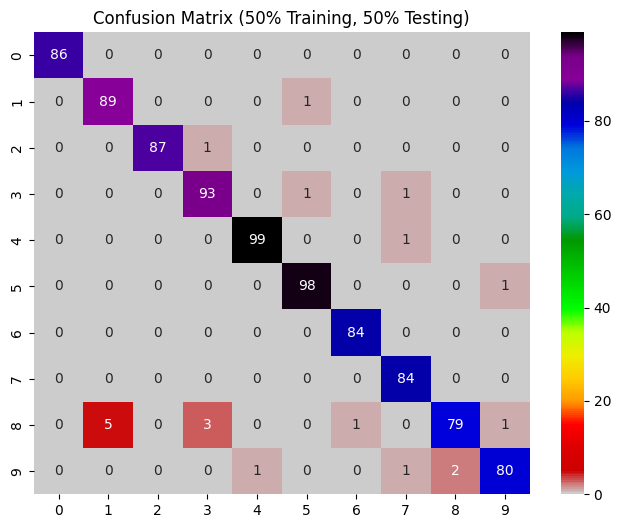

In [81]:
# Visualizing the confusion matrix using a heatmap
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_50_50, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (50% Training, 50% Testing)')

In [ ]:
#30% training and 70% testing

In [68]:
# Splitting the dataset: 30% training and 70% testing
X_train_30, X_test_70, y_train_30, y_test_70 = train_test_split(digits.data, digits.target, train_size=0.3, test_size=0.7, random_state=11)

In [69]:
# Creating and training the model
knn_30_70 = KNeighborsClassifier()
knn_30_70.fit(X=X_train_30, y=y_train_30)

KNeighborsClassifier()

In [70]:
# Making predictions
predicted_30_70 = knn_30_70.predict(X=X_test_70)

In [71]:
predicted_30_70

array([0, 4, 9, ..., 9, 2, 8])

In [72]:
# Comparing predictions with expected values
expected_30_70 = y_test_70

In [73]:
expected_30_70

array([0, 4, 9, ..., 9, 2, 8])

In [74]:
# Calculating accuracy
accuracy_30_70 = knn_30_70.score(X_test_70, y_test_70)
print(f'Accuracy for 30% Training and 70% Testing: {accuracy_30_70:.2%}')

Accuracy for 30% Training and 70% Testing: 96.34%


In [75]:
# Creating a confusion matrix
confusion_30_70 = confusion_matrix(y_true=expected_30_70, y_pred=predicted_30_70)

In [76]:
confusion_30_70

array([[121,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2, 127,   0,   0,   0,   0,   1,   4,   0],
       [  0,   0,   0, 118,   0,   1,   1,   1,   0,   0],
       [  0,   1,   0,   0, 129,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0, 130,   0,   0,   0,   6],
       [  0,   0,   0,   0,   0,   0, 123,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 124,   0,   0],
       [  0,   7,   1,   2,   0,   0,   2,   1, 104,   2],
       [  0,   0,   0,   0,   0,   1,   0,   6,   2, 107]])

In [77]:
# Converting the confusion matrix to a DataFrame
confusion_df_30_70 = pd.DataFrame(confusion_30_70, index=range(10), columns=range(10))

In [78]:
confusion_df_30_70

,0,1,2,3,4,5,6,7,8,9
0,121,0,0,0,0,0,0,0,0,0
1,0,129,0,0,0,0,0,0,0,0
2,1,2,127,0,0,0,0,1,4,0
3,0,0,0,118,0,1,1,1,0,0
4,0,1,0,0,129,0,0,3,0,0
5,0,0,0,0,0,130,0,0,0,6
6,0,0,0,0,0,0,123,0,1,0
7,0,0,0,0,0,0,0,124,0,0
8,0,7,1,2,0,0,2,1,104,2
9,0,0,0,0,0,1,0,6,2,107


Text(0.5, 1.0, 'Confusion Matrix (30% Training, 70% Testing)')

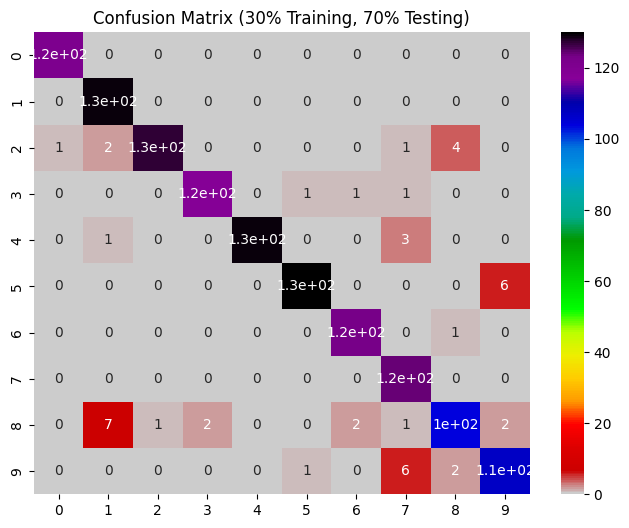

In [80]:
# Visualizing the confusion matrix using a heatmap
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_30_70, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (30% Training, 70% Testing)')